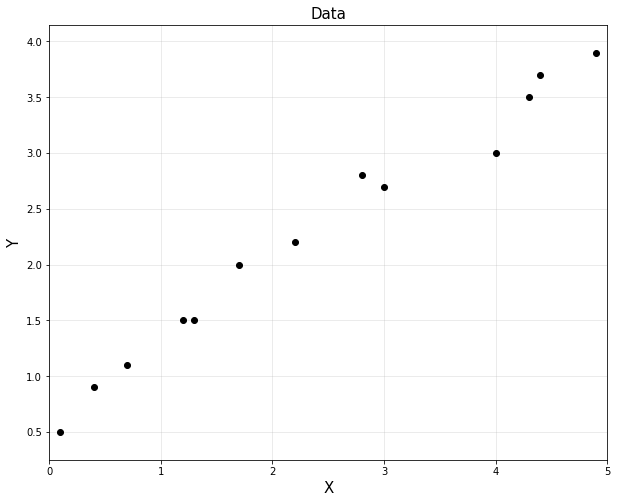

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# data points in column vector [input, output]
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'ko')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

theta:
 [[0.65306531]
 [0.67129519]]


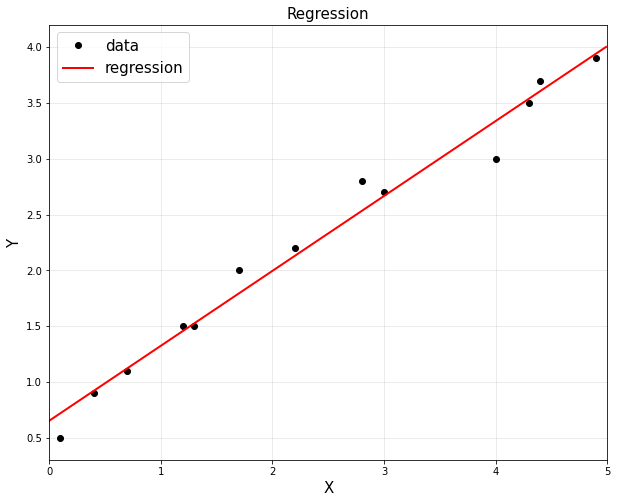

In [16]:
m = y.shape[0]
#A = np.hstack([np.ones([m, 1]), x])
A = np.hstack([x**0, x])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y

print('theta:\n', theta)
# to plot
plt.figure(figsize = (10, 8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = "data")

# to plot a straight line (fitted line)
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = theta[0,0] + theta[1,0]*xp

plt.plot(xp, yp, 'r', linewidth = 2, label = "regression")
plt.legend(fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

In [20]:
import cvxpy as cvx

theta2 = cvx.Variable([2, 1])
obj = cvx.Minimize(cvx.norm(A*theta2-y, 2))
prob = cvx.Problem(obj,[])
result = prob.solve()

print('theta:\n',theta2.value)


theta:
 [[0.65306531]
 [0.67129519]]


c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


In [22]:
import cvxpy as cvx

theta1 = cvx.Variable([2, 1])
obj = cvx.Minimize(cvx.norm(A*theta1-y, 2))
prob = cvx.Problem(obj,[])
result = prob.solve()

print('theta:\n',theta1.value)

theta:
 [[0.65306531]
 [0.67129519]]


c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


In [23]:
# add outliers
x = np.vstack([x, np.array([0.5, 3.8]).reshape(-1, 1)])
y = np.vstack([y, np.array([3.9, 0.3]).reshape(-1, 1)])

A = np.hstack([x**0, x])
A = np.asmatrix(A)

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\numpy\matrixlib\defmatrix.py:69: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


In [24]:
A.shape

(15, 2)

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


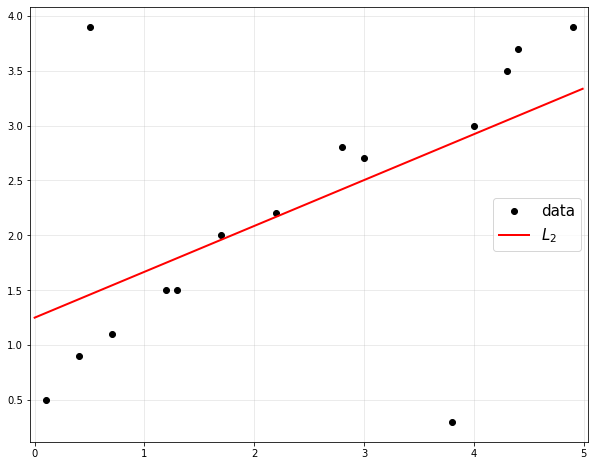

In [25]:
theta2 = cvx.Variable([2, 1])
obj2 = cvx.Minimize(cvx.norm(A*theta2-y, 2))
prob2 = cvx.Problem(obj2).solve()
# to plot straight lines (fitted lines)
plt.figure(figsize = (10, 8))
plt.plot(x, y, 'ko', label = 'data')
xp = np.arange(0, 5, 0.01).reshape(-1,1)
yp2 = theta2.value[0,0] + theta2.value[1,0]*xp

plt.plot(xp, yp2, 'r', linewidth = 2, label = '$L_2$')
plt.axis('equal')
plt.xlim([0, 5])
plt.legend(fontsize = 15, loc = 5)
plt.grid(alpha = 0.3)
plt.show()

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


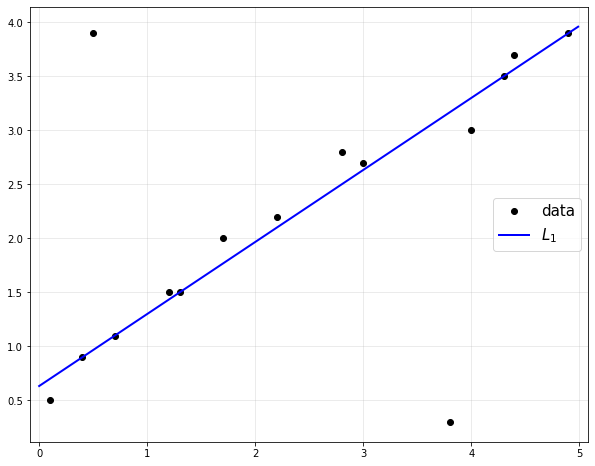

In [26]:
theta1 = cvx.Variable([2, 1])
obj1 = cvx.Minimize(cvx.norm(A*theta1-y, 1))
prob1 = cvx.Problem(obj1).solve()
# to plot straight lines (fitted lines)
plt.figure(figsize = (10, 8))
plt.plot(x, y, 'ko', label = 'data')
xp = np.arange(0, 5, 0.01).reshape(-1,1)
yp1 = theta1.value[0,0] + theta1.value[1,0]*xp

plt.plot(xp, yp1, 'b', linewidth = 2, label = '$L_1$')
plt.axis('equal')
plt.xlim([0, 5])
plt.legend(fontsize = 15, loc = 5)
plt.grid(alpha = 0.3)
plt.show()

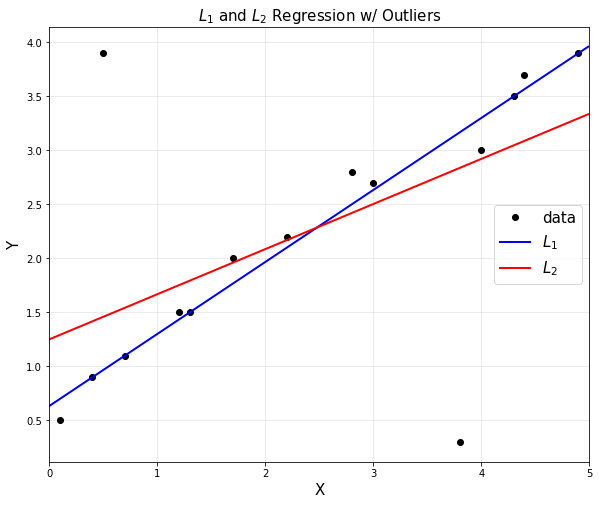

In [27]:
# to plot data
plt.figure(figsize = (10, 8))
plt.plot(x, y, 'ko', label = 'data')
plt.title('$L_1$ and $L_2$ Regression w/ Outliers', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)

# to plot straight lines (fitted lines)
xp = np.arange(0, 5, 0.01).reshape(-1,1)
yp1 = theta1.value[0,0] + theta1.value[1,0]*xp
yp2 = theta2.value[0,0] + theta2.value[1,0]*xp

plt.plot(xp, yp1, 'b', linewidth = 2, label = '$L_1$')
plt.plot(xp, yp2, 'r', linewidth = 2, label = '$L_2$')
plt.axis('scaled')
plt.xlim([0, 5])
plt.legend(fontsize = 15, loc = 5)
plt.grid(alpha = 0.3)
plt.show()


In [32]:
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)



In [34]:
from sklearn import linear_model

In [35]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
reg.coef_

array([[0.67129519]])

In [37]:
reg.intercept_

array([0.65306531])

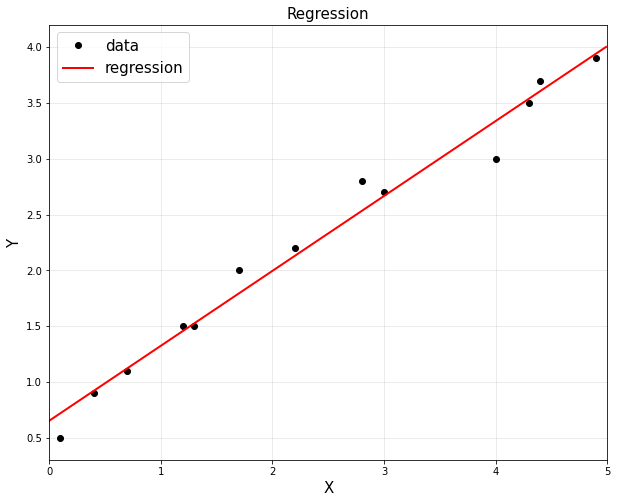

In [38]:
# to plot
plt.figure(figsize = (10, 8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = "data")

# to plot a straight line (fitted line)
plt.plot(xp, reg.predict(xp), 'r', linewidth = 2, label = "regression")
plt.legend(fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()


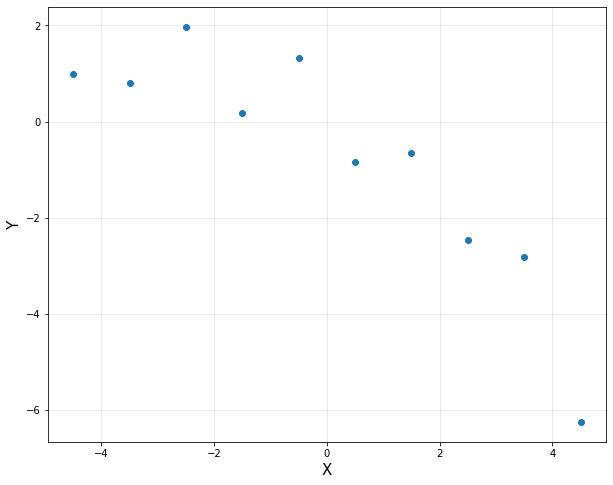

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 10 data points
n = 10
x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

In [2]:
A = np.hstack([x**0, x])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y
print(theta)

[[-0.7774    ]
 [-0.71070424]]


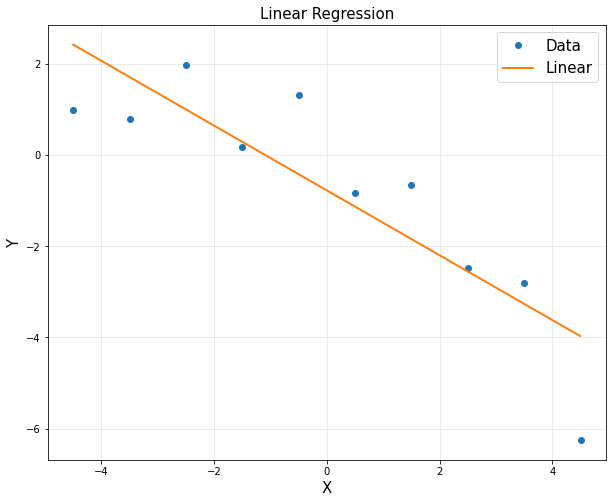

In [3]:
# to plot
xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)
yp = theta[0,0] + theta[1,0]*xp 

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp[:,0], yp[:,0], linewidth = 2, label = 'Linear')
plt.title('Linear Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()


In [4]:
A = np.hstack([x**0, x, x**2])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y
print(theta)

[[ 0.33669062]
 [-0.71070424]
 [-0.13504129]]


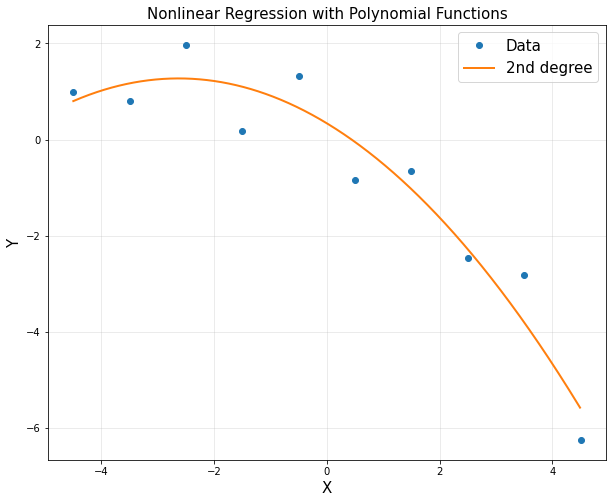

In [5]:
# to plot
xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)
yp = theta[0,0] + theta[1,0]*xp + theta[2,0]*xp**2 

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp[:,0], yp[:,0], linewidth = 2, label = '2nd degree')
plt.title('Nonlinear Regression with Polynomial Functions', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

[[ 3.48274701e-01]
 [-2.58951123e+00]
 [-4.55286474e-01]
 [ 1.85022226e+00]
 [ 1.06250369e-01]
 [-4.43328786e-01]
 [-9.25753472e-03]
 [ 3.63088178e-02]
 [ 2.35143849e-04]
 [-9.24099978e-04]]


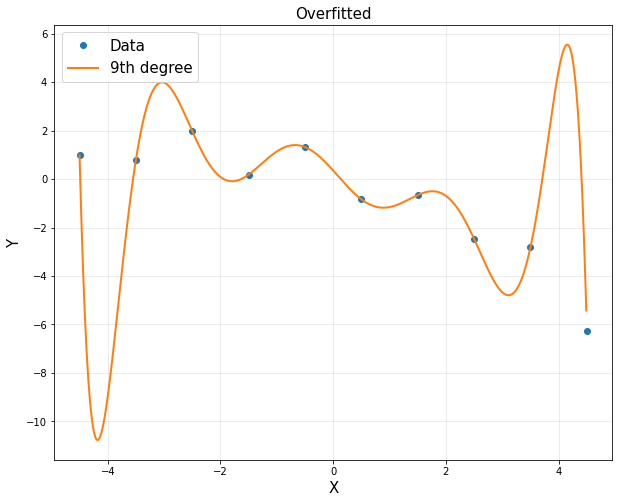

In [6]:
A = np.hstack([x**i for i in range(10)])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y
print(theta)

# to plot
xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

polybasis = np.hstack([xp**i for i in range(10)])
polybasis = np.asmatrix(polybasis)

yp = polybasis*theta

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp[:,0], yp[:,0], linewidth = 2, label = '9th degree')
plt.title('Overfitted', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

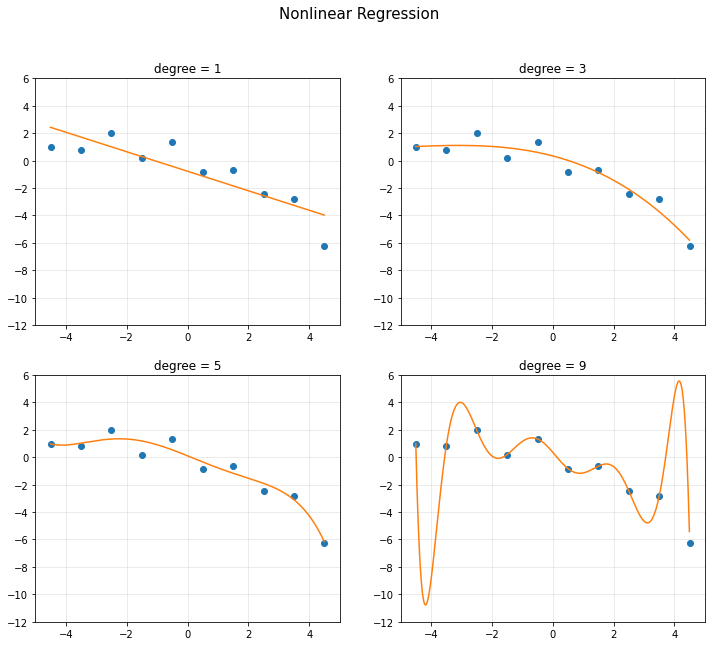

In [7]:
d = [1, 3, 5, 9]
RSS = []

plt.figure(figsize = (12, 10))
plt.suptitle('Nonlinear Regression', fontsize = 15)

for k in range(4):
    A = np.hstack([x**i for i in range(d[k]+1)])
    polybasis = np.hstack([xp**i for i in range(d[k]+1)])
    
    A = np.asmatrix(A)
    polybasis = np.asmatrix(polybasis)
    
    theta = (A.T*A).I*A.T*y
    yp = polybasis*theta
    
    RSS.append(np.linalg.norm(y - A*theta, 2)**2)
    
    plt.subplot(2, 2, k+1)
    plt.plot(x, y, 'o')
    plt.plot(xp, yp)
    plt.axis([-5, 5, -12, 6])
    plt.title('degree = {}'.format(d[k]))
    plt.grid(alpha=0.3)
    
plt.show()


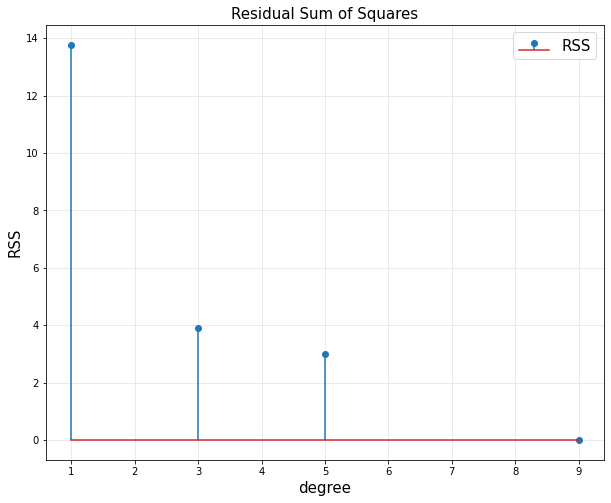

In [8]:
plt.figure(figsize = (10, 8))
plt.stem(d, RSS, label = 'RSS')
plt.title('Residual Sum of Squares', fontsize = 15)
plt.xlabel('degree', fontsize = 15)
plt.ylabel('RSS', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

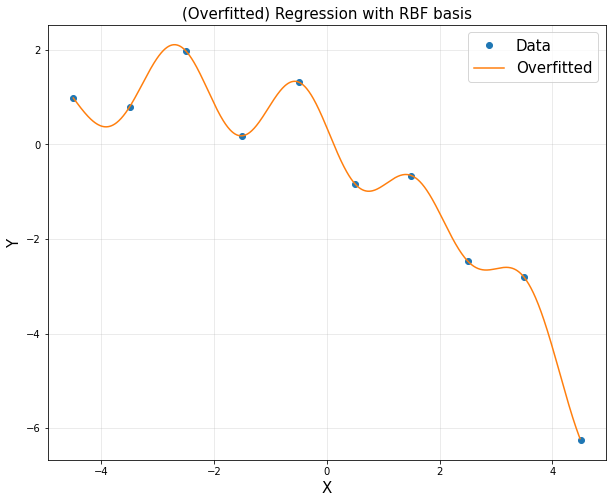

In [9]:
xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

d = 10
u = np.linspace(-4.5, 4.5, d)
sigma = 1

rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])
A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])

rbfbasis = np.asmatrix(rbfbasis)
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y
yp = rbfbasis*theta

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'Overfitted')
plt.title('(Overfitted) Regression with RBF basis', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)
plt.show()

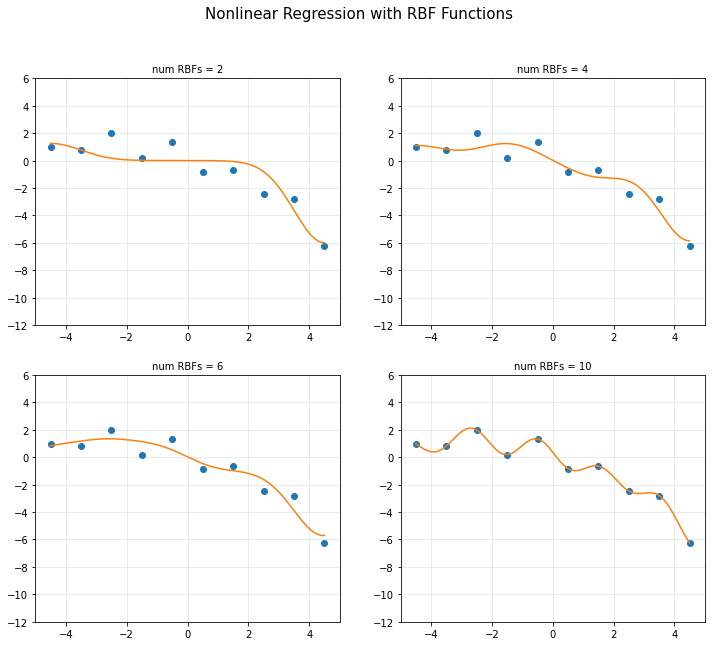

In [11]:
d = [2, 4, 6, 10]
sigma = 1

plt.figure(figsize = (12, 10))

for k in range(4):
    u = np.linspace(-4.5, 4.5, d[k])
    
    A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d[k])])
    rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d[k])])
    
    A = np.asmatrix(A)
    rbfbasis = np.asmatrix(rbfbasis)
    
    theta = (A.T*A).I*A.T*y
    yp = rbfbasis*theta
    
    plt.subplot(2, 2, k+1)
    plt.plot(x, y, 'o')
    plt.plot(xp, yp)
    plt.axis([-5, 5, -12, 6])
    plt.title('num RBFs = {}'.format(d[k]), fontsize = 10)
    plt.grid(alpha = 0.3)

plt.suptitle('Nonlinear Regression with RBF Functions', fontsize = 15)
plt.show()

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\numpy\matrixlib\defmatrix.py:69: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


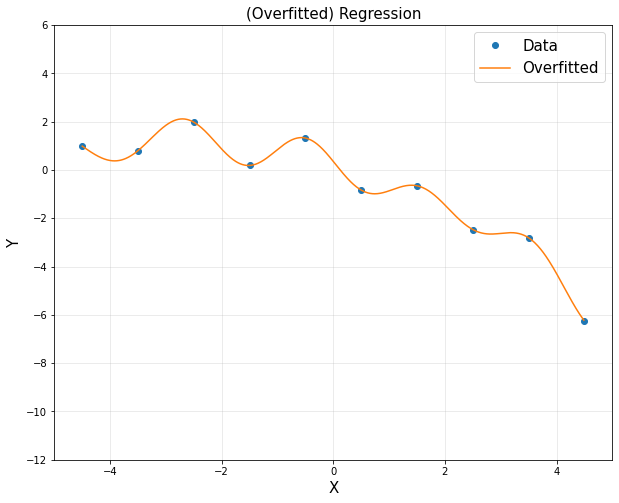

In [12]:
# CVXPY code

import cvxpy as cvx

d = 10
u = np.linspace(-4.5, 4.5, d)
sigma = 1

rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])
A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])

rbfbasis = np.asmatrix(rbfbasis)
A = np.asmatrix(A)

theta = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A*theta-y))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'Overfitted')
plt.title('(Overfitted) Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\numpy\matrixlib\defmatrix.py:69: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


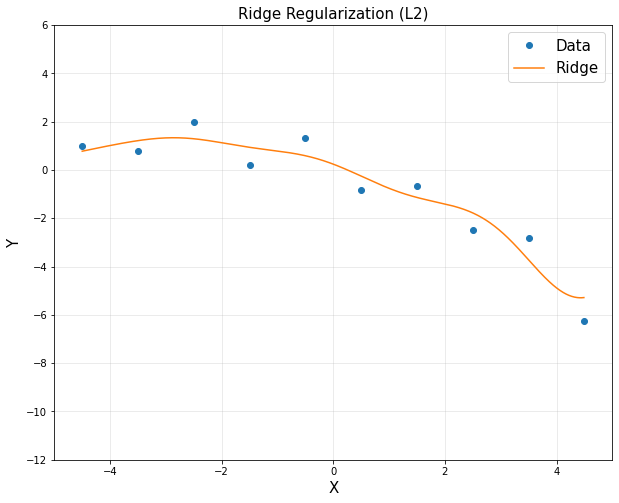

In [16]:
# ridge regression 

lamb = 0.1
theta = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + lamb*cvx.sum_squares(theta))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'Ridge')
plt.title('Ridge Regularization (L2)', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

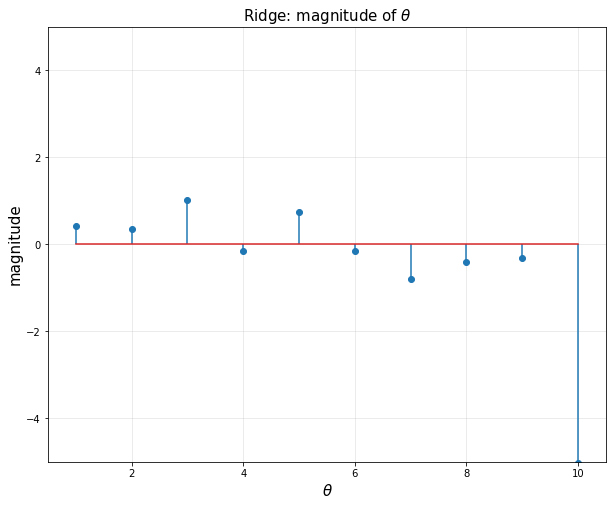

In [14]:
# Regulization (= ridge nonlinear regression) encourages small weights, but not exactly 0

plt.figure(figsize = (10, 8))
plt.title(r'Ridge: magnitude of $\theta$', fontsize = 15)
plt.xlabel(r'$\theta$', fontsize = 15)
plt.ylabel('magnitude', fontsize = 15)
plt.stem(np.linspace(1, 10, 10).reshape(-1, 1), theta.value)
plt.xlim([0.5, 10.5])
plt.ylim([-5, 5])
plt.grid(alpha = 0.3)
plt.show()

<>:13: DeprecationWarning: invalid escape sequence \l
<>:13: DeprecationWarning: invalid escape sequence \l
<>:13: DeprecationWarning: invalid escape sequence \l
<ipython-input-17-15542d28abb4>:13: DeprecationWarning: invalid escape sequence \l
  plt.xlabel('$\lambda$', fontsize = 15)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has b

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

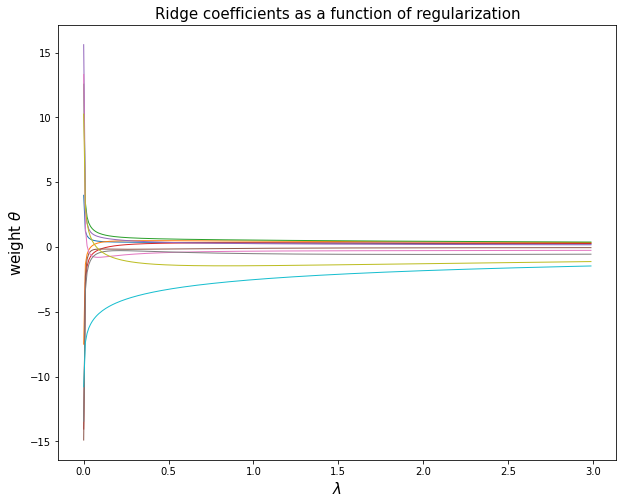

In [17]:
lamb = np.arange(0,3,0.01)

theta_record = []
for k in lamb:
    theta = cvx.Variable([d, 1])
    obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + k*cvx.sum_squares(theta))
    prob = cvx.Problem(obj).solve()
    theta_record.append(np.ravel(theta.value))

plt.figure(figsize = (10, 8))
plt.plot(lamb, theta_record, linewidth = 1)
plt.title('Ridge coefficients as a function of regularization', fontsize = 15)
plt.xlabel('$\lambda$', fontsize = 15)
plt.ylabel(r'weight $\theta$', fontsize = 15)
plt.show()

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\numpy\matrixlib\defmatrix.py:69: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


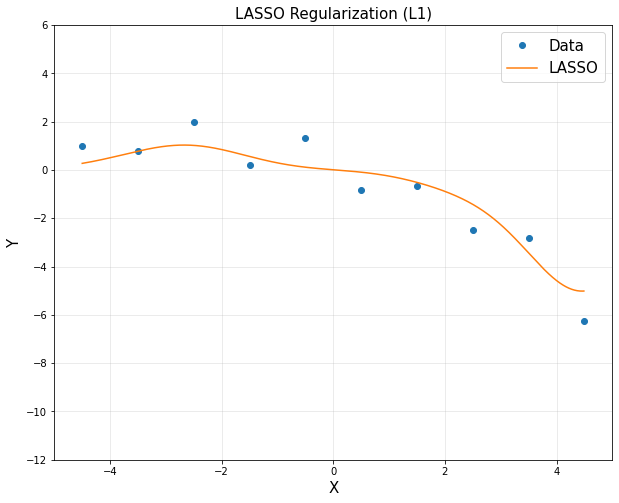

In [18]:
# LASSO regression 

lamb = 2
theta = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + lamb*cvx.norm(theta, 1))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize = (10, 8))
plt.title('LASSO Regularization (L1)', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'LASSO')
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

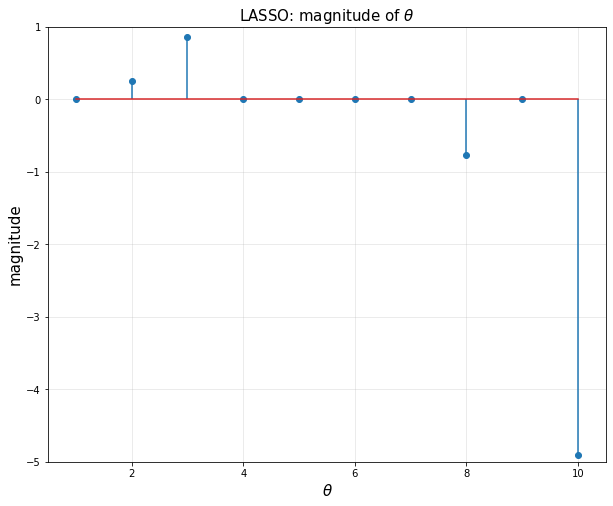

In [19]:

# Regulization (= Lasso nonlinear regression) encourages zero weights

plt.figure(figsize = (10, 8))
plt.title(r'LASSO: magnitude of $\theta$', fontsize = 15)
plt.xlabel(r'$\theta$', fontsize = 15)
plt.ylabel('magnitude', fontsize = 15)
plt.stem(np.arange(1,11), theta.value)
plt.xlim([0.5, 10.5])
plt.ylim([-5,1])
plt.grid(alpha = 0.3)
plt.show()

<>:13: DeprecationWarning: invalid escape sequence \l
<>:13: DeprecationWarning: invalid escape sequence \l
<>:13: DeprecationWarning: invalid escape sequence \l
<ipython-input-20-d5591b0d213d>:13: DeprecationWarning: invalid escape sequence \l
  plt.xlabel('$\lambda$', fontsize = 15)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has b

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\a

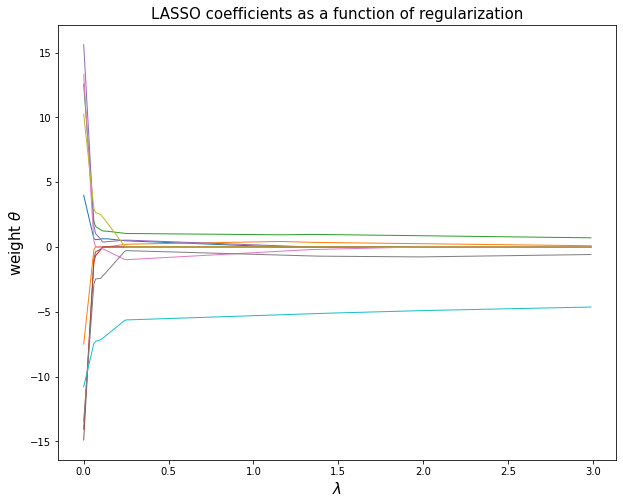

In [20]:
lamb = np.arange(0,3,0.01)

theta_record = []
for k in lamb:
    theta = cvx.Variable([d, 1])
    obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + k*cvx.norm(theta, 1))
    prob = cvx.Problem(obj).solve()
    theta_record.append(np.ravel(theta.value))

plt.figure(figsize = (10, 8))
plt.plot(lamb, theta_record, linewidth = 1)
plt.title('LASSO coefficients as a function of regularization', fontsize = 15)
plt.xlabel('$\lambda$', fontsize = 15)
plt.ylabel(r'weight $\theta$', fontsize = 15)
plt.show()

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\numpy\matrixlib\defmatrix.py:69: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\numpy\matrixlib\defmatrix.py:69: PendingDe

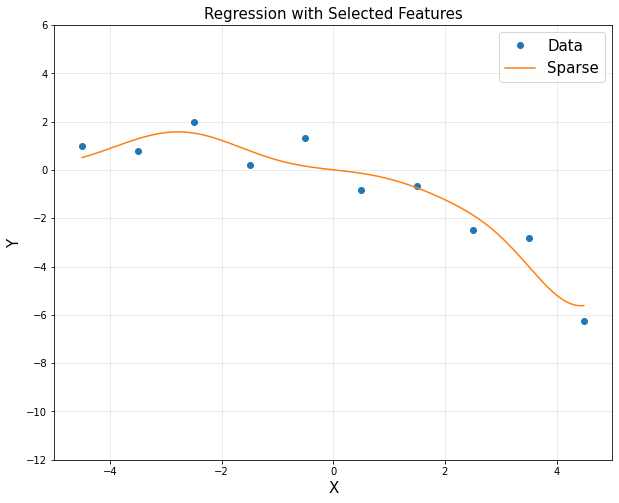

In [21]:
# reduced order model
# we will use only theta 2, 3, 8, 10 

d = 4
u = np.array([-3.5, -2.5, 2.5, 4.5])
sigma = 1

rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])
A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])

rbfbasis = np.asmatrix(rbfbasis)
A = np.asmatrix(A)

theta = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.norm(A*theta-y, 2))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'Sparse')
plt.title('Regression with Selected Features', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

%matplotlib inline

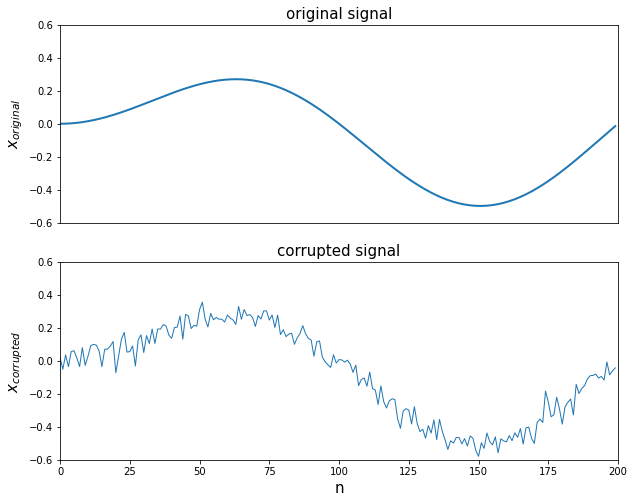

In [2]:
n = 200
t = np.arange(n).reshape(-1,1)
x = 0.5 * np.sin((2*np.pi/n)*t) * (np.sin(0.01*t))
x_cor = x + 0.05*np.random.randn(n,1)

plt.figure(figsize = (10, 8))
plt.subplot(2,1,1)
plt.plot(t,x,'-', linewidth = 2)
plt.axis([0, n, -0.6, 0.6])
plt.xticks([])
plt.title('original signal' , fontsize = 15)
plt.ylabel('$x_{original}$', fontsize = 15)

plt.subplot(2,1,2)
plt.plot(t, x_cor,'-', linewidth = 1)
plt.axis([0, n, -0.6, 0.6])
plt.title('corrupted signal', fontsize = 15)
plt.xlabel('n', fontsize = 15)
plt.ylabel('$x_{corrupted}$', fontsize = 15)
plt.show()

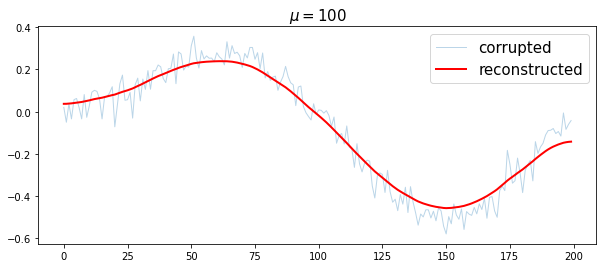

In [3]:
mu = 100

D = np.zeros([n-1, n])
D[:,0:n-1] -= np.eye(n-1)

D[:,1:n] += np.eye(n-1)
A = np.vstack([np.eye(n), np.sqrt(mu)*D])

b = np.vstack([x_cor, np.zeros([n-1,1])])

A = np.asmatrix(A)
b = np.asmatrix(b)

x_reconst = (A.T*A).I*A.T*b

plt.figure(figsize = (10, 4))
plt.plot(t, x_cor, '-', linewidth = 1, alpha = 0.3, label = 'corrupted');
plt.plot(t, x_reconst, 'r', linewidth = 2, label = 'reconstructed')
plt.title('$\mu = {}$'.format(mu), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

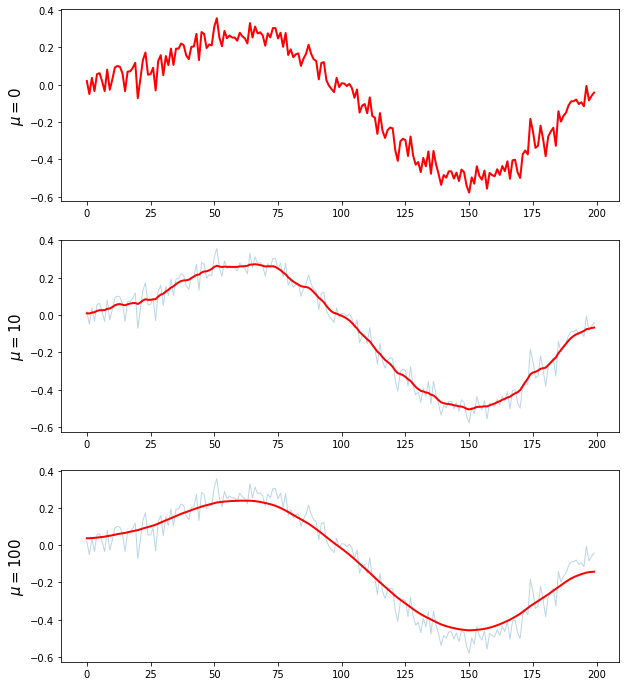

In [4]:
plt.figure(figsize = (10, 12))

mu = [0, 10, 100];

for i in range(len(mu)):    
    A = np.vstack([np.eye(n), np.sqrt(mu[i])*D])
    b = np.vstack([x_cor, np.zeros([n-1,1])])

    A = np.asmatrix(A)
    b = np.asmatrix(b)
    
    x_reconst = (A.T*A).I*A.T*b
    
    plt.subplot(3,1,i+1)
    plt.plot(t, x_cor, '-', linewidth = 1, alpha = 0.3)
    plt.plot(t, x_reconst, 'r', linewidth = 2)
    plt.ylabel('$\mu = {}$'.format(mu[i]), fontsize = 15)

plt.show()

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


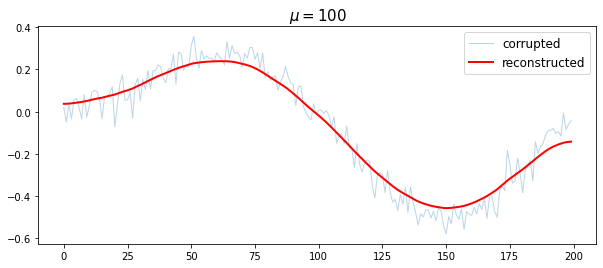

In [5]:
mu = 100

x_reconst = cvx.Variable([n,1])
#obj = cvx.Minimize(cvx.sum_squares(x_reconst - x_cor) + mu*cvx.sum_squares(x_reconst[1:n]-x_reconst[0:n-1]))
obj = cvx.Minimize(cvx.sum_squares(x_reconst - x_cor) + mu*cvx.sum_squares(D*x_reconst))

prob = cvx.Problem(obj).solve()

plt.figure(figsize = (10, 4))
plt.plot(t, x_cor, '-', linewidth = 1, alpha = 0.3, label = 'corrupted');
plt.plot(t, x_reconst.value, 'r', linewidth = 2, label = 'reconstructed')
plt.title('$\mu = {}$'.format(mu), fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

<>:13: DeprecationWarning: invalid escape sequence \m
<>:13: DeprecationWarning: invalid escape sequence \m
<>:13: DeprecationWarning: invalid escape sequence \m
<ipython-input-6-83df032637b8>:13: DeprecationWarning: invalid escape sequence \m
  plt.ylabel('$\mu = {}$'.format(int(mu[i])), fontsize = 15)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix m

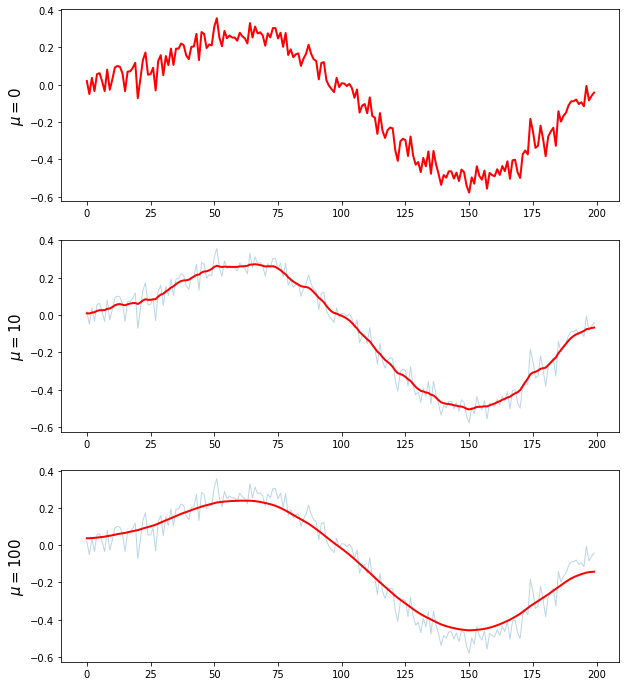

In [6]:
plt.figure(figsize = (10, 12))

mu = [0, 10, 100]

for i in range(len(mu)):
    x_reconst = cvx.Variable([n,1])
    obj = cvx.Minimize(cvx.sum_squares(x_reconst - x_cor) + mu[i]*cvx.sum_squares(D*x_reconst))
    prob = cvx.Problem(obj).solve()

    plt.subplot(3,1,i+1)
    plt.plot(t,x_cor,'-', linewidth = 1, alpha = 0.3)
    plt.plot(t,x_reconst.value, 'r', linewidth = 2)
    plt.ylabel('$\mu = {}$'.format(int(mu[i])), fontsize = 15)

plt.show()

<>:13: DeprecationWarning: invalid escape sequence \g
<>:13: DeprecationWarning: invalid escape sequence \g
<>:13: DeprecationWarning: invalid escape sequence \g
<ipython-input-7-fd1cfae1f5b4>:13: DeprecationWarning: invalid escape sequence \g
  plt.ylabel('$ \gamma = {}$'.format(gammas[i]), fontsize = 15)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matri

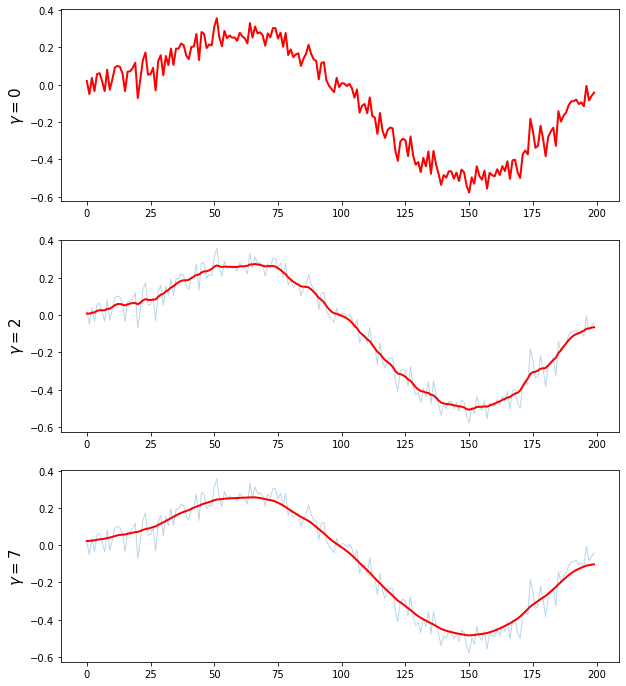

In [7]:
plt.figure(figsize = (10, 12))
    
gammas = [0, 2, 7]

for i in range(len(gammas)):
    x_reconst = cvx.Variable([n,1])
    obj = cvx.Minimize(cvx.norm(x_reconst-x_cor, 2) + gammas[i]*(cvx.norm(D*x_reconst, 2)))
    prob = cvx.Problem(obj).solve()

    plt.subplot(3,1,i+1)
    plt.plot(t,x_cor,'-', linewidth = 1, alpha = 0.3)
    plt.plot(t,x_reconst.value, 'r', linewidth = 2)
    plt.ylabel('$ \gamma = {}$'.format(gammas[i]), fontsize = 15)
    
plt.show()


c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


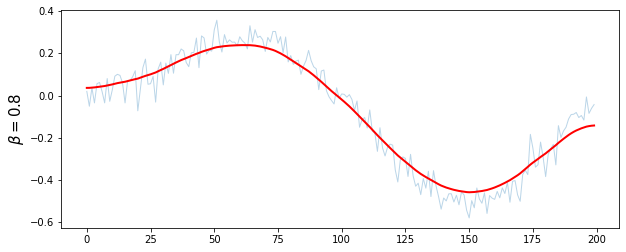

In [8]:
beta = 0.8
    
x_reconst = cvx.Variable([n,1])
obj = cvx.Minimize(cvx.norm(D*x_reconst, 2))
const = [cvx.norm(x_reconst-x_cor, 2) <= beta]
prob = cvx.Problem(obj, const).solve()

plt.figure(figsize = (10, 4))
plt.plot(t,x_cor,'-', linewidth = 1, alpha = 0.3)
plt.plot(t,x_reconst.value, 'r', linewidth = 2)
plt.ylabel(r'$\beta = {}$'.format(beta), fontsize = 15)
plt.show()

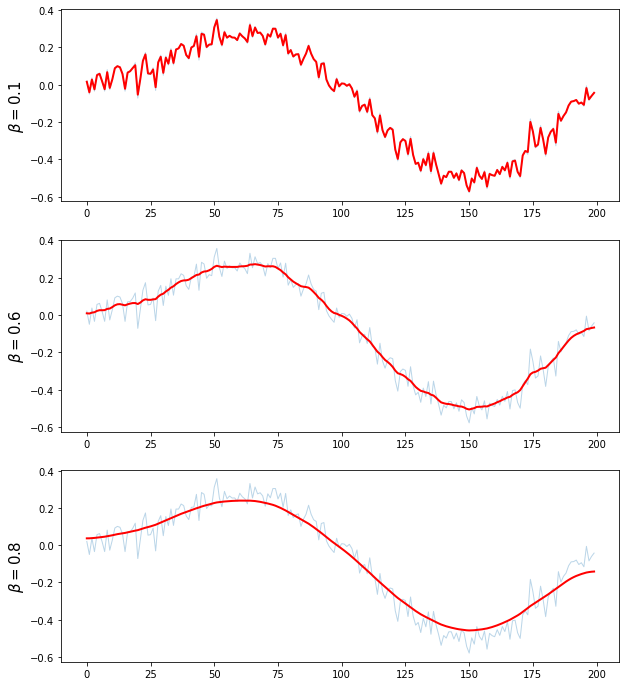

In [9]:
plt.figure(figsize = (10, 12))

beta = [0.1, 0.6, 0.8]

for i in range(len(beta)):
    
    x_reconst = cvx.Variable([n,1])
    obj = cvx.Minimize(cvx.norm(x_reconst[1:n] - x_reconst[0:n-1], 2))
    const = [cvx.norm(x_reconst-x_cor, 2) <= beta[i]]
    prob = cvx.Problem(obj, const).solve()
    
    plt.subplot(len(beta),1,i+1)
    plt.plot(t,x_cor,'-', linewidth = 1, alpha = 0.3)
    plt.plot(t,x_reconst.value, 'r', linewidth = 2)
    plt.ylabel(r'$\beta = {}$'.format(beta[i]), fontsize = 15)
    
plt.show()


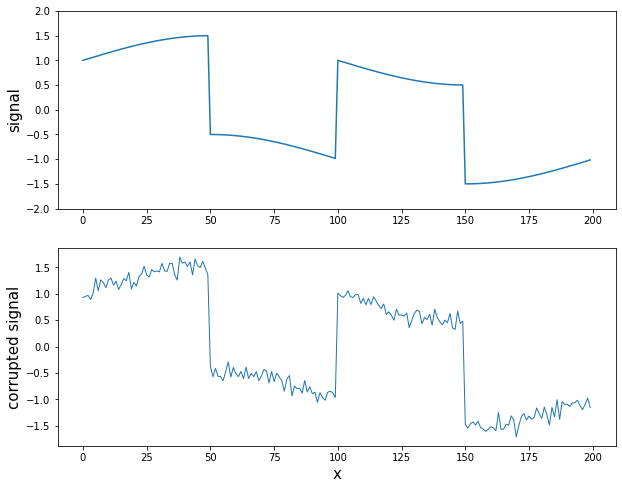

In [10]:
n = 200
t = np.arange(n).reshape(-1,1)

exact = np.vstack([np.ones([50,1]), -np.ones([50,1]), np.ones([50,1]), -np.ones([50,1])])
x = exact + 0.5*np.sin((2*np.pi/n)*t)
x_cor = x + 0.1*np.random.randn(n,1)

plt.figure(figsize = (10, 8))
plt.subplot(2,1,1)
plt.plot(t, x)
plt.ylim([-2.0,2.0])
plt.ylabel('signal', fontsize = 15)
plt.subplot(2,1,2)
plt.plot(t, x_cor, linewidth = 1)
plt.ylabel('corrupted signal', fontsize = 15)
plt.xlabel('x', fontsize = 15)
plt.show()

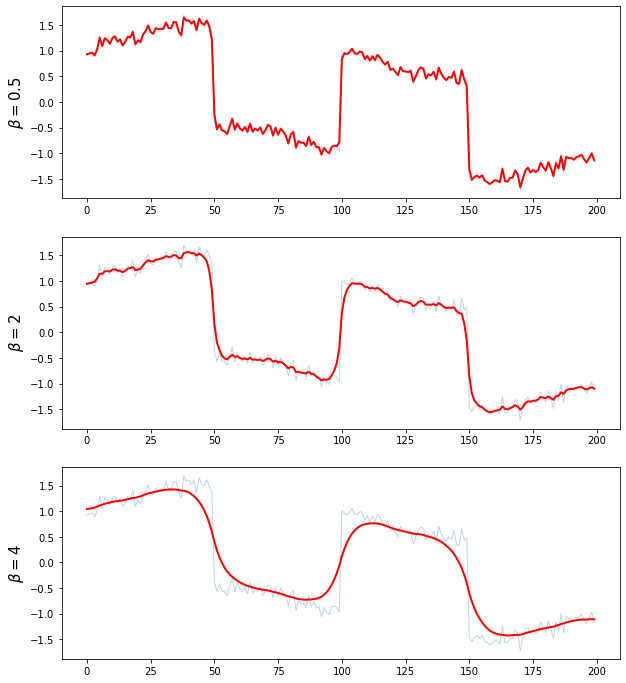

In [11]:
plt.figure(figsize = (10, 12))

beta = [0.5, 2, 4]

for i in range(len(beta)):
    x_reconst = cvx.Variable([n,1])
    obj = cvx.Minimize(cvx.norm(x_reconst[1:n] - x_reconst[0:n-1], 2))
    const = [cvx.norm(x_reconst - x_cor, 2) <= beta[i]]
    prob = cvx.Problem(obj, const).solve()
    
    plt.subplot(len(beta), 1, i+1)
    plt.plot(t, x_cor, linewidth = 1, alpha = 0.3)
    plt.plot(t, x_reconst.value, 'r', linewidth = 2)
    plt.ylabel(r'$\beta = {}$'.format(beta[i]), fontsize = 15)
    
plt.show()

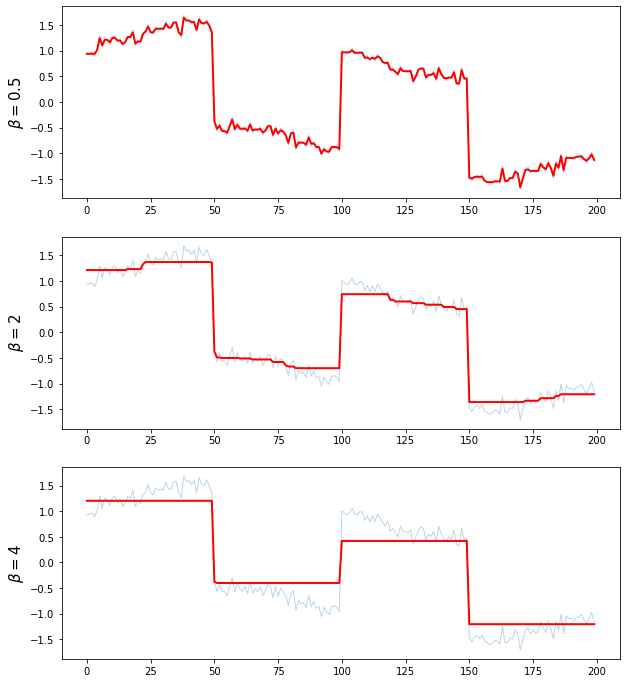

In [12]:
plt.figure(figsize = (10, 12))

beta = [0.5, 2, 4]

for i in range(len(beta)):
    x_reconst = cvx.Variable([n,1])
    obj = cvx.Minimize(cvx.norm(x_reconst[1:n] - x_reconst[0:n-1], 1))
    const = [cvx.norm(x_reconst-x_cor, 2) <= beta[i]]
    prob = cvx.Problem(obj, const).solve()
    
    plt.subplot(len(beta), 1, i+1)
    plt.plot(t, x_cor, linewidth = 1, alpha = 0.3)
    plt.plot(t, x_reconst.value, 'r', linewidth = 2)
    plt.ylabel(r'$\beta = {}$'.format(beta[i]), fontsize = 15)
    
plt.show()